In [6]:
import pandas as pd
from aif360.datasets import BinaryLabelDataset

In [11]:
import riskareg as r
import simpsons_paradox as sp
import statparity as s

## Simpsons Paradox

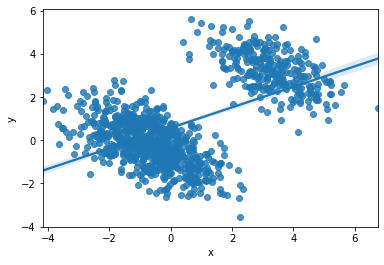

In [13]:
df = sp.simpsons_paradox.data_sample()

x = sp.simpsons_paradox(df, 'x', 'y')

x.plot_general_trend()

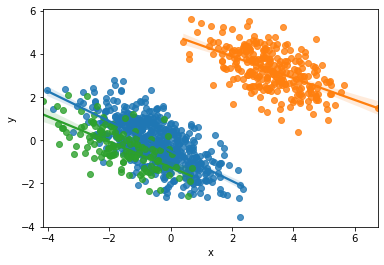

In [14]:
x.plot_simpsons_paradox('z')

In [15]:
x.eval_simpsons_paradox('z')

(['x'], ['z'])

## Statistical Parity

In [8]:
dataset = pd.read_csv('all_state.csv', sep=';')

dataset['male'] = dataset['gender'] == 'M'
dataset['middle-aged'] = (dataset['age'] > 40) & (dataset['age'] <= 60)
dataset['ypc_1'] = dataset['ypc'] == 1

dataset_min = dataset[['large_increase', 'male', 'middle-aged', 'ypc_1']]


df = BinaryLabelDataset(df=dataset_min, label_names=['large_increase'],
                        protected_attribute_names=['male', 'middle-aged', 'ypc_1'],
                        favorable_label=0, unfavorable_label=1)

x = s.statparity(df)

x.report()

Name  Mean Difference
0         male            -0.00
1  middle-aged            -0.02
2        ypc_1            -0.00

## Ommited variable bias

In [17]:
help(r)

Help on module riskareg:

NAME
    riskareg - Created on Wed Jan  6 20:18:11 2021

DESCRIPTION
    @author: jdavidmartinezg

CLASSES
    builtins.object
        riskareg
    
    class riskareg(builtins.object)
     |  riskareg(df, risk_var, decision_var, covariates)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, df, risk_var, decision_var, covariates)
     |      Parameters
     |      ----------
     |      df : Pandas dataframe 
     |          Dataframe with features to evaluate. There should be at least 3 columns:
     |          one for the risk, another for the binary decision and at least one covariate.
     |      
     |      risk_var: String signalling the name of the column in df containing information regarding risk.
     |      
     |      decision_var: String signalling the name of the column in df containing information regarding decision to be evaluated in fairness.
     |      
     |      covariates : Python list containing the names of the c

In [19]:
df = r.riskareg.data_sample()

In [20]:
x = r.riskareg(df, 'risk', 'decision' , ['c','d'])

In [21]:
x.risk_adj_disparity('a')

Optimization terminated successfully.
         Current function value: 0.674216
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.688647
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               decision   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:                0.004696
Time:                        21:33:18   Log-Likelihood:                -137.73
converged:                       True   LL-Null:                       -138.38
Covariance Type:            nonrobust   LLR p-value:                    0.2543
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [22]:
allstate = pd.read_csv('all_state.csv', sep = ';')

In [23]:
allstate['Male'] = (allstate.gender == 'M').astype(float)
x = riskareg.riskareg(allstate, 'risk_proxy_cat', 'large_increase' , ['ypc', 'median_income'])

In [24]:
x.risk_adj_disparity('age')

Optimization terminated successfully.
         Current function value: 0.032933
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.096885
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         large_increase   No. Observations:                92548
Model:                          Logit   Df Residuals:                    92546
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:                0.003224
Time:                        21:34:18   Log-Likelihood:                -8966.5
converged:                       True   LL-Null:                       -8995.5
Covariance Type:            nonrobust   LLR p-value:                 2.612e-14
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [25]:
x.risk_adj_disparity('Male')

Optimization terminated successfully.
         Current function value: 0.032933
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.096965
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         large_increase   No. Observations:                92548
Model:                          Logit   Df Residuals:                    92546
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:                0.002406
Time:                        21:34:36   Log-Likelihood:                -8973.9
converged:                       True   LL-Null:                       -8995.5
Covariance Type:            nonrobust   LLR p-value:                 4.716e-11
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------